# 데이터 분석 전 사전 알림
- 7개의 유니콘기업을 크롤링한 자료에 기반하여, 중소기업현황정보시스템 총매출액을 추가 (3팀 아이디어 참고)
- 월별_연금보험료는 `직원수 X 평균급여 X 0.045` 로 계산 (사측이 4.5% 부담)
- 시각화는 동일한 코드로 작성
- 월별_연금보험료는 직원수와 큰 상관관계를 갖기 때문에 시각화 제외

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import sys

warnings.filterwarnings('ignore')

print("파이썬 버전 :",sys.version)
print("판다스 버전 :",pd.__version__)

파이썬 버전 : 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
판다스 버전 : 1.1.3


In [2]:
df = pd.read_excel("./파이널.xlsx")
df.drop('Unnamed: 0', axis=1, inplace=True)
display(df)
print(df.info())

,회사ID,월별_직원수,년월,월별_평균급여,연매출액
0,우아한형제들,216,1511,2993545,NaN
1,우아한형제들,221,1512,2974596,NaN
2,우아한형제들,219,1601,3097467,84850263.0
3,우아한형제들,222,1602,2994015,84850263.0
4,우아한형제들,226,1603,3055818,84850263.0
...,...,...,...,...,...
295,비바리퍼블리카,264,1908,4200937,118730969.0
296,비바리퍼블리카,272,1909,4250067,118730969.0
297,비바리퍼블리카,298,1910,4266147,118730969.0
298,비바리퍼블리카,310,1911,4187554,118730969.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   회사ID     300 non-null    object 
 1   월별_직원수   300 non-null    int64  
 2   년월       300 non-null    int64  
 3   월별_평균급여  300 non-null    int64  
 4   연매출액     288 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 11.8+ KB
None


### 현재 단계에서 필요한 전처리
- NaN 값이 포함된 raw를 drop한다.
- 날짜 컬럼을 20xx.xx 형태로 변환한 뒤, datatime 타입으로 바꾼다.
- 평균급여와 직원수를 이용해 월별_연금보험료를 컬럼을 생성한다.

In [3]:
# 결측치가 존재하는 행 제거
df.dropna(axis=0, inplace=True)
display(df)

,회사ID,월별_직원수,년월,월별_평균급여,연매출액
2,우아한형제들,219,1601,3097467,84850263.0
3,우아한형제들,222,1602,2994015,84850263.0
4,우아한형제들,226,1603,3055818,84850263.0
5,우아한형제들,232,1604,3099138,84850263.0
6,우아한형제들,244,1605,3094462,84850263.0
...,...,...,...,...,...
295,비바리퍼블리카,264,1908,4200937,118730969.0
296,비바리퍼블리카,272,1909,4250067,118730969.0
297,비바리퍼블리카,298,1910,4266147,118730969.0
298,비바리퍼블리카,310,1911,4187554,118730969.0


In [4]:
# 날짜데이터 변경
new_date_list = []
for x in range(len(df)):
    new_date = str(20)+str(df.iloc[x][2])
    new_date_list.append(new_date)

df['년월'] = new_date_list
df['년월'] = pd.to_datetime(df['년월'],format='%Y%m').dt.strftime('%Y%m') # 2016-01-01 형태로 바뀐 뒤, 201601 형태로만 출력하는 메서드 활용

display(df)
print(df.info())

,회사ID,월별_직원수,년월,월별_평균급여,연매출액
2,우아한형제들,219,201601,3097467,84850263.0
3,우아한형제들,222,201602,2994015,84850263.0
4,우아한형제들,226,201603,3055818,84850263.0
5,우아한형제들,232,201604,3099138,84850263.0
6,우아한형제들,244,201605,3094462,84850263.0
...,...,...,...,...,...
295,비바리퍼블리카,264,201908,4200937,118730969.0
296,비바리퍼블리카,272,201909,4250067,118730969.0
297,비바리퍼블리카,298,201910,4266147,118730969.0
298,비바리퍼블리카,310,201911,4187554,118730969.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 2 to 299
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   회사ID     288 non-null    object 
 1   월별_직원수   288 non-null    int64  
 2   년월       288 non-null    object 
 3   월별_평균급여  288 non-null    int64  
 4   연매출액     288 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 13.5+ KB
None


In [5]:
# 월별_연금보험료 컬럼 생성
df['월별_연금보험료'] = (df['월별_직원수'] * df['월별_평균급여'] * 0.045).round(0)
display(df)

,회사ID,월별_직원수,년월,월별_평균급여,연매출액,월별_연금보험료
2,우아한형제들,219,201601,3097467,84850263.0,30525537.0
3,우아한형제들,222,201602,2994015,84850263.0,29910210.0
4,우아한형제들,226,201603,3055818,84850263.0,31077669.0
5,우아한형제들,232,201604,3099138,84850263.0,32355001.0
6,우아한형제들,244,201605,3094462,84850263.0,33977193.0
...,...,...,...,...,...,...
295,비바리퍼블리카,264,201908,4200937,118730969.0,49907132.0
296,비바리퍼블리카,272,201909,4250067,118730969.0,52020820.0
297,비바리퍼블리카,298,201910,4266147,118730969.0,57209031.0
298,비바리퍼블리카,310,201911,4187554,118730969.0,58416378.0


In [6]:
# 원래 있는 평균급여 컬럼 drop
df = df.drop('월별_평균급여', axis=1)
display(df)

,회사ID,월별_직원수,년월,연매출액,월별_연금보험료
2,우아한형제들,219,201601,84850263.0,30525537.0
3,우아한형제들,222,201602,84850263.0,29910210.0
4,우아한형제들,226,201603,84850263.0,31077669.0
5,우아한형제들,232,201604,84850263.0,32355001.0
6,우아한형제들,244,201605,84850263.0,33977193.0
...,...,...,...,...,...
295,비바리퍼블리카,264,201908,118730969.0,49907132.0
296,비바리퍼블리카,272,201909,118730969.0,52020820.0
297,비바리퍼블리카,298,201910,118730969.0,57209031.0
298,비바리퍼블리카,310,201911,118730969.0,58416378.0


In [7]:
# 동일한 시각화 진행

def visualization(df,x) :
    new_name = df[df['회사ID']==x]
    print(x,"회사 그래프입니다.")
    plt.figure(figsize=(20,10))
    plt.subplot(221)
    plt.plot(new_name['년월'],new_name['연매출액'])
    plt.title("매출액", fontsize=25)
    plt.xticks(rotation='vertical')
    plt.subplot(222)
    plt.plot(new_name['년월'],new_name['월별_직원수'])
    plt.title("직원수", fontsize=25)
    plt.xticks(rotation='vertical')
    plt.show()
    print()
    print()

우아한형제들 회사 그래프입니다.


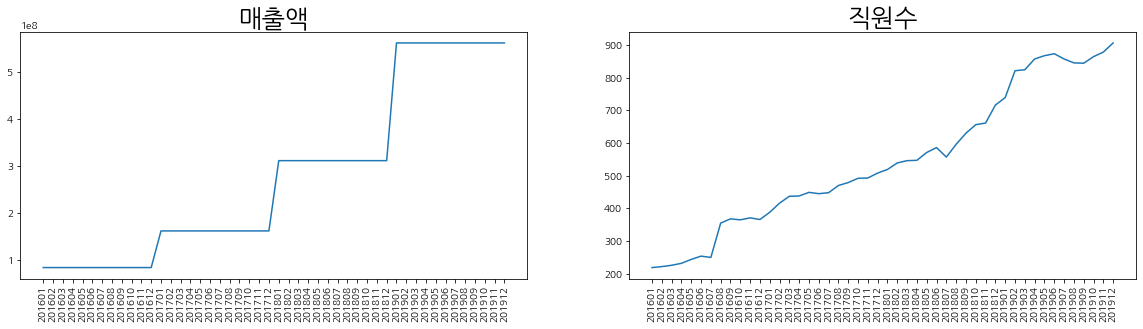



크래프톤 회사 그래프입니다.


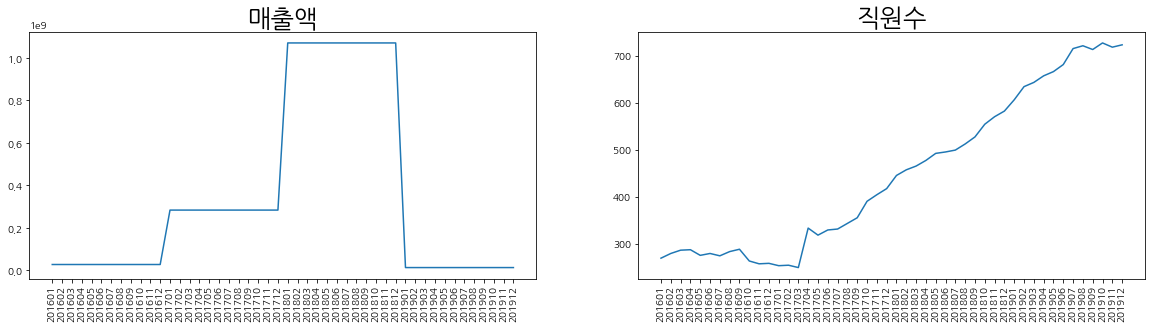



야놀자 회사 그래프입니다.


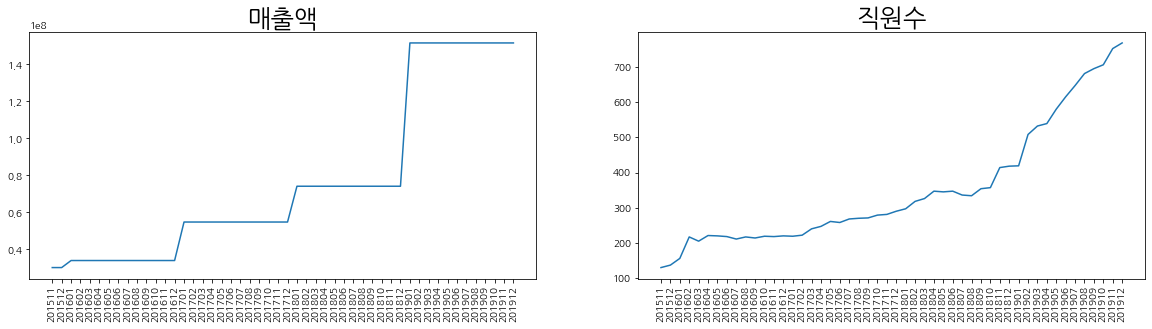



블랭크코퍼레이션 회사 그래프입니다.


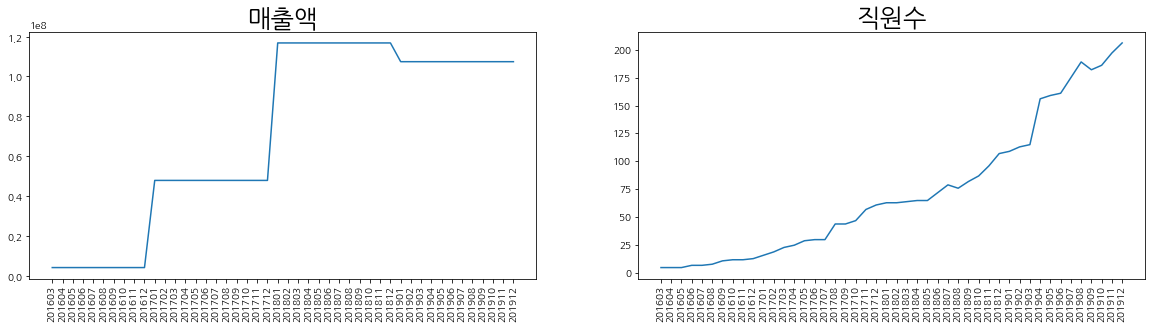



뱅크웨어글로벌 회사 그래프입니다.


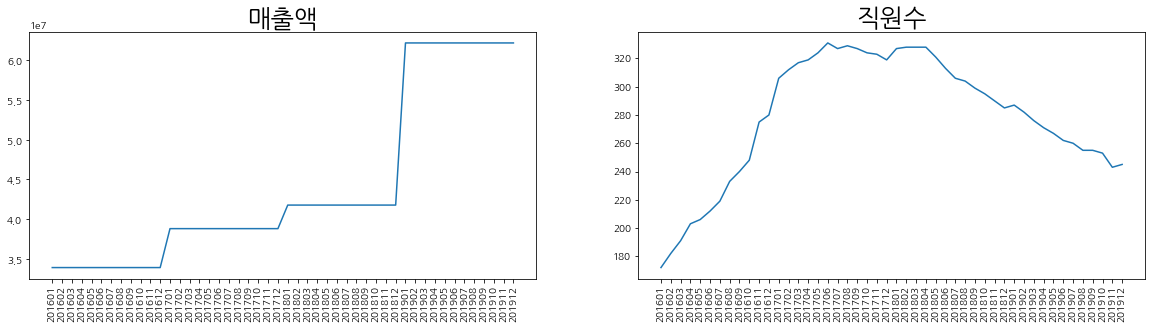



비바리퍼블리카 회사 그래프입니다.


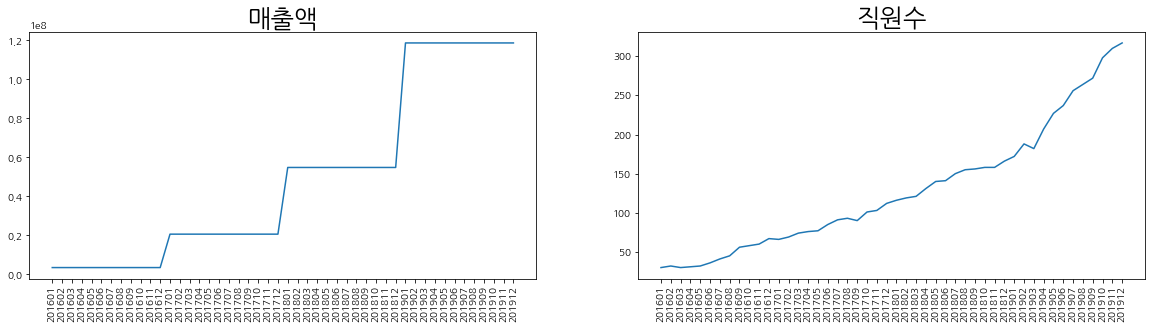

In [8]:
list_id = df['회사ID'].unique()

for x in list_id :
    visualization(df,x)

# 정리
- 사전에 진행한 시각화와 유사한 형태를 갖는다. (대체로 매출액과 직원수 모두 우상향 곡선을 그린다.)
- 때문에 사전분석으로 추출된 기업은 유니콘기업이라 추측할 수 있다.